<center><h1>Rashinkar_Payal_HW2</h1></center>
<br>
<br>

Name: Payal Rashinkar
<br>
Github Username: PayalRashinkar
<br>
USC ID: 3885-1419-03

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
import random
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.formula.api as smf

Get the Cycle Power Plant Data Set
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
COLUMN_NAMES = ["AT", "V", "AP", "RH", "PE"]
PATH = ('../Data/CCPP/Folds5x2_pp.xlsx')
df = pd.read_excel(PATH)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
rows = df.shape[0]
columns = df.shape[1]
header = ["Rows", "Columns"]
row_data = [[rows, columns]]
pd.DataFrame(data=row_data, columns=["Rows", "Columns"])

,Rows,Columns
0,9568,5


Rows:
    The rows represent hourly average data of 4 features i.e. AT, V, AP, RH and 
    hourly average output of power (PE) based on these features.
Columns:
    The columns represent the feature values seperately for 4 features collected on hourly average 
    and its hourly electrical ouput in (PE).

#### ii. pairwise scatterplots of all the varianbles

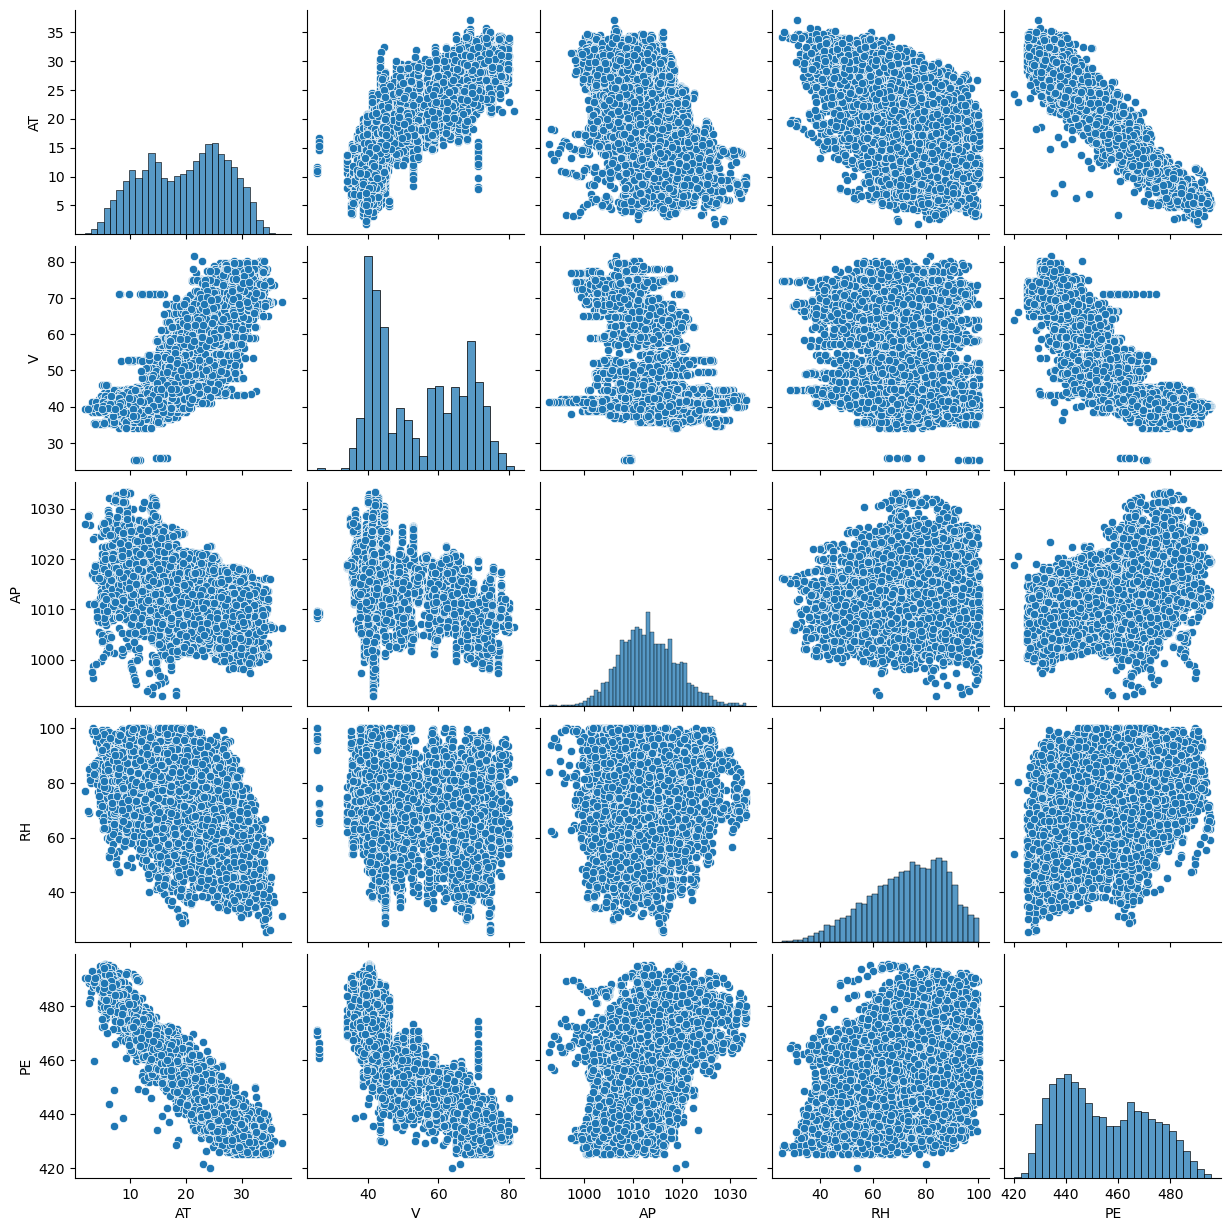

In [4]:
sns.pairplot(df)

With increase in V there is decrease in PE, hence inversely propotional.
With increase in AT there is decrease in PE, hence inversely proposiotional.
With increase in V there is increase in AT, hence directly propotional.
Diagonals are univariate and displays a histogram.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
means = df.mean()
medians = df.median()
ranges = df.max() - df.min()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
table = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Range': ranges,
    'Q1': q1,
    'Q3': q3,
    'IQR': iqr
})
print(table)

           Mean    Median  Range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


### (c) Simple Linear Regression

In [6]:
coefficients = {}
def linear_regression_model(input_var):
    print(f"\n\nLinear Regression fit for independant variable  = {input_var}")
    if input_var != "PE":
        dependent_variable = df["PE"].to_numpy()
        independent_variable = df[input_var].to_numpy()
        independent_variable_constant = sm.add_constant(independent_variable, prepend=False)
        regression_model = sm.OLS(dependent_variable, independent_variable_constant).fit()
        print(regression_model.summary())
        cooks_threshold = 4 / len(df)
        model_influence = regression_model.get_influence()
        cooks_distance = model_influence.cooks_distance
        outlier_indices = np.where(cooks_distance[0] > cooks_threshold)
        coefficients[input_var] = regression_model.params
        fig, axes = plt.subplots(figsize=(12, 7))
        with plt.style.context('ggplot'):
            axes.scatter(independent_variable, dependent_variable, alpha=0.3, label="Observations")
            axes.scatter(independent_variable[outlier_indices], dependent_variable[outlier_indices], marker="*", label="Outliers")
            axes.plot(independent_variable, regression_model.predict(independent_variable_constant), "tab:green", label="Regression Result")
        axes.set_title(f"Linear Regression for {input_var}")
        axes.set_xlabel(input_var)
        axes.set_ylabel("PE")
        axes.legend()
        plt.show()
        outliers_data = np.vstack((independent_variable[outlier_indices], dependent_variable[outlier_indices]))
        return pd.DataFrame(outliers_data)



Linear Regression fit for independant variable  = AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

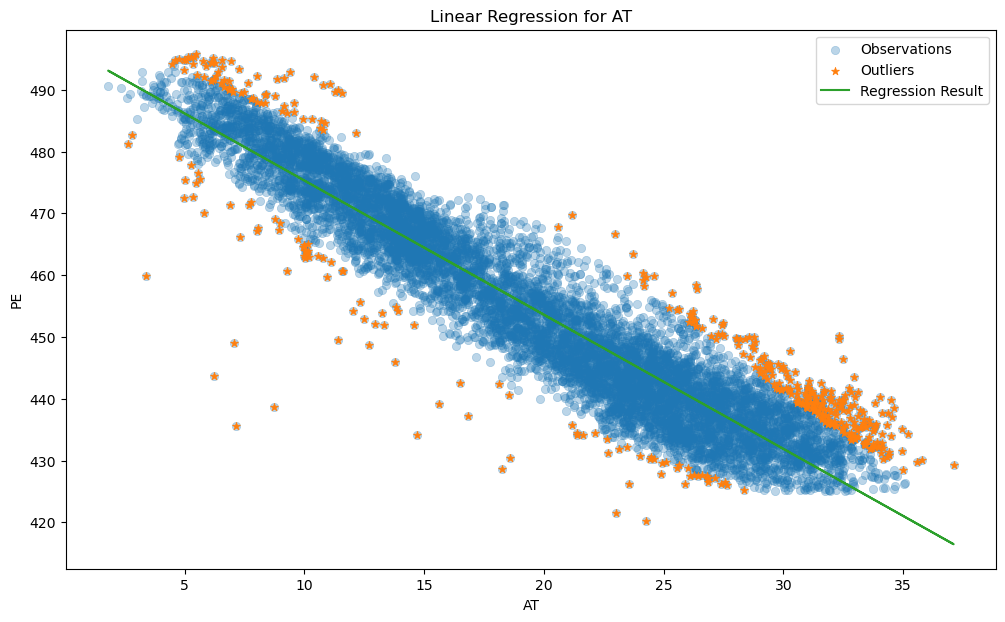

        AT      PE
0     5.41  495.24
1    29.01  446.22
2    32.72  437.99
3    35.56  429.69
4    27.54  450.22
..     ...     ...
411  33.20  438.12
412  30.26  442.98
413  34.03  440.29
414   5.01  475.34
415  26.22  454.20

[416 rows x 2 columns]


In [7]:
outliers_temperature = linear_regression_model("AT")
outliers_data_frame = outliers_temperature.T #To transpose .T
outliers_data_frame.columns = ["AT", "PE"]
print(outliers_data_frame)



Linear Regression fit for independant variable  = V
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

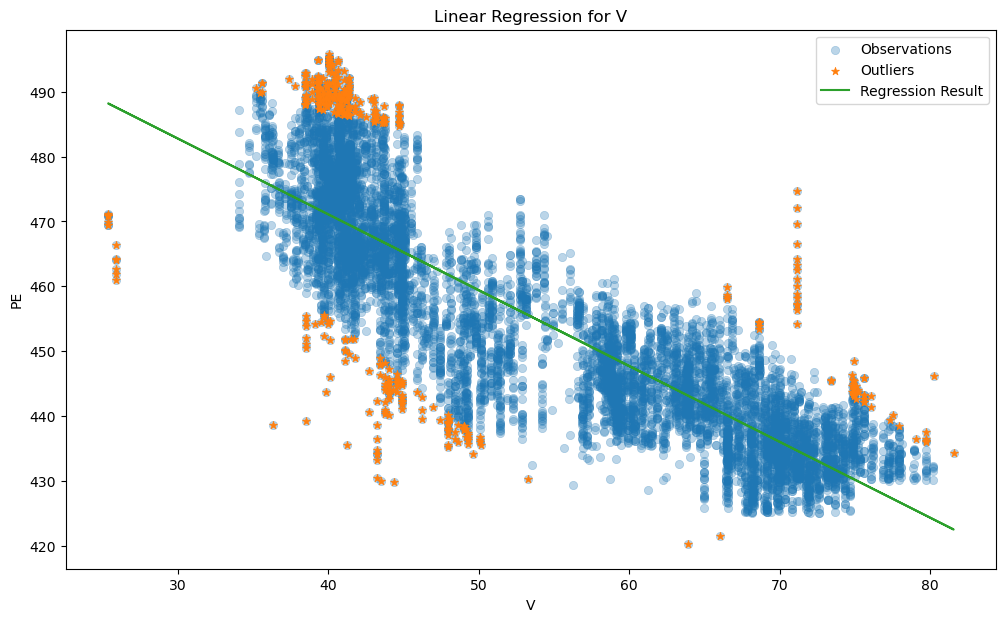

         V      PE
0    39.40  488.56
1    40.07  495.24
2    48.60  436.06
3    43.43  448.06
4    39.33  491.49
..     ...     ...
418  75.23  443.78
419  39.72  455.58
420  44.89  445.45
421  43.77  446.05
422  25.36  470.90

[423 rows x 2 columns]


In [8]:
outliers_temperature = linear_regression_model("V")
outliers_data_frame = outliers_temperature.T #To transpose .T
outliers_data_frame.columns = ["V", "PE"]
print(outliers_data_frame)



Linear Regression fit for independant variable  = AP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:31   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

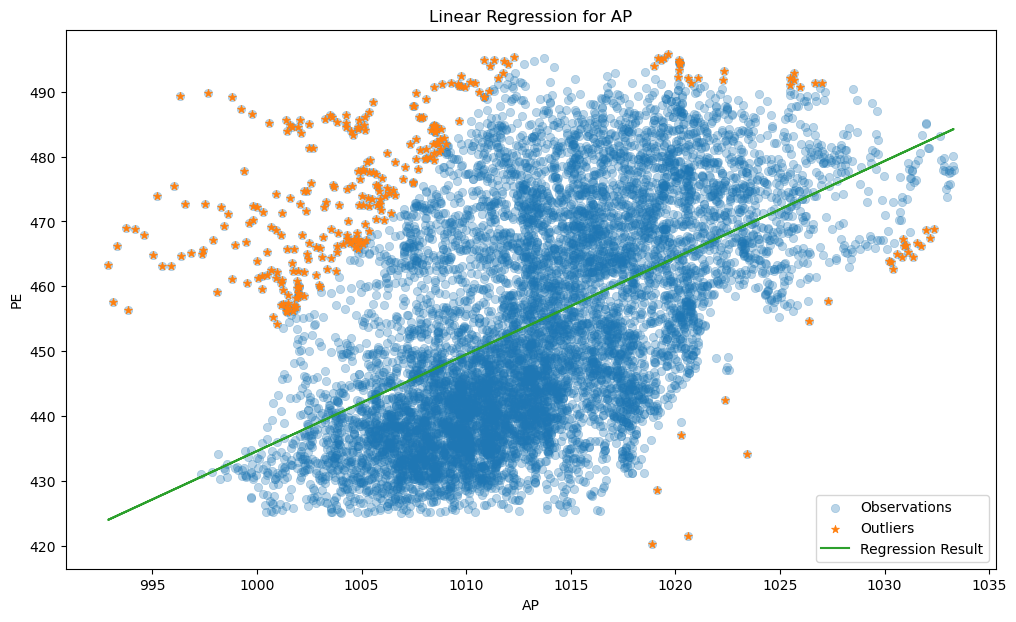

          AP      PE
0    1019.16  495.24
1    1008.52  483.80
2    1010.18  491.49
3    1008.82  481.09
4    1001.24  459.36
..       ...     ...
295  1030.61  464.95
296  1008.43  484.75
297  1005.24  479.22
298   998.27  472.16
299  1003.69  475.34

[300 rows x 2 columns]


In [9]:
outliers_temperature = linear_regression_model("AP")
outliers_data_frame = outliers_temperature.T #To transpose .T
outliers_data_frame.columns = ["AP", "PE"]
print(outliers_data_frame)



Linear Regression fit for independant variable  = RH
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:32   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

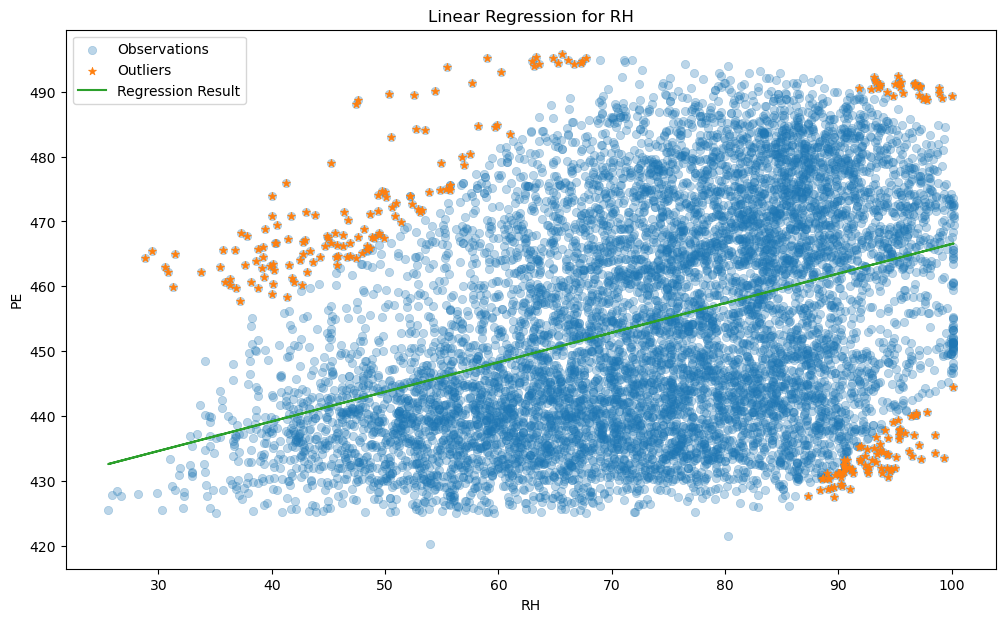

        RH      PE
0    41.25  475.98
1    43.08  462.19
2    48.84  467.54
3    64.77  495.24
4    50.00  474.60
..     ...     ...
244  97.21  490.68
245  98.84  490.50
246  90.20  430.55
247  93.39  434.11
248  99.27  433.62

[249 rows x 2 columns]


In [10]:
outliers_temperature = linear_regression_model("RH")
outliers_data_frame = outliers_temperature.T #To transpose .T
outliers_data_frame.columns = ["RH", "PE"]
print(outliers_data_frame)

All models have statistically significant association with response variable. as the p-value of each independant variables are least.

### (d) Multiple regression model

In [11]:
input_vars = df.iloc[:, 0:len(df.columns) - 1]
input_vars = sm.add_constant(input_vars.to_numpy(), prepend=False)
multiple_reg_model = sm.OLS(df["PE"].to_numpy(), input_vars)
multiple_reg_model = multiple_reg_model.fit()
print(multiple_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9775      0.015   -129.342      0.0

We can reject the null hypothesis for all the input variables as p-value is 0 for all.

### (e) 1c Compare to 1d

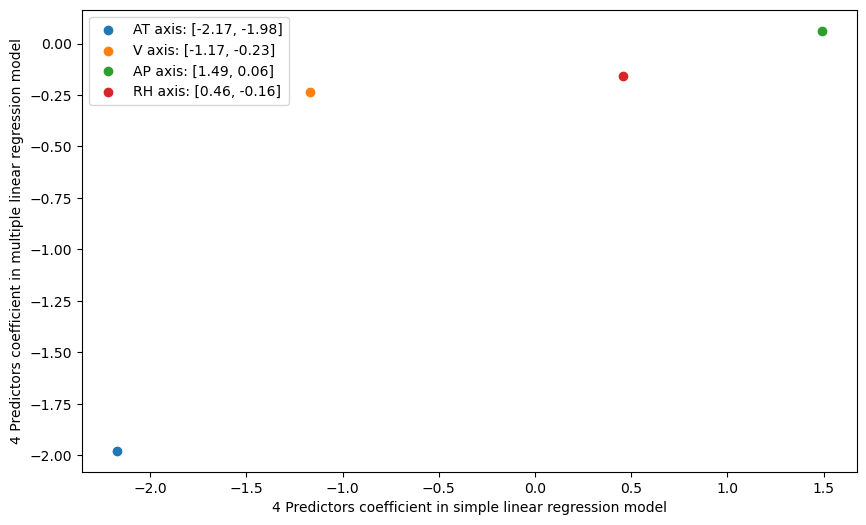

In [12]:
fig, axes = plt.subplots(figsize=(10, 6))
for i, column in enumerate(df.columns[0:len(df.columns) - 1]):    
    labels = f"{column} axis: [{round(coefficients[column][0], 2)}, {round(multiple_reg_model.params[i], 2)}]"
    axes.scatter(coefficients[column][0], multiple_reg_model.params[i], label=labels)
axes.set_xlabel("4 Predictors coefficient in simple linear regression model")
axes.set_ylabel("4 Predictors coefficient in multiple linear regression model")
axes.legend()
plt.show()

### (f) Nonlinear Association

In [13]:
def nonlinear_association(predictor):
    power = 3
    polynomial = PolynomialFeatures(power)
    trainX = polynomial.fit_transform(df[predictor].to_numpy().reshape(-1, 1))
    model = sm.OLS(df["PE"].to_numpy(), trainX).fit()
    print(model.summary())

print("\n\nEvidence of non linear association for input var: AT")
nonlinear_association("AT")
print("\n\nEvidence of non linear association for input var: V")
nonlinear_association("V")
print("\n\nEvidence of non linear association for input var: AP")
nonlinear_association("AP")
print("\n\nEvidence of non linear association for input var: RH")
nonlinear_association("RH")



Evidence of non linear association for input var: AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Yes, there is an evidence of non linear association between the predictor "V" and the response term.
As we can see for predictor "V", X2 and X3's p-value is 0.768 and 0.014 respectively, which signifies the non linearity between that predictor and the response term.

Rest of the input variables have linear associations as there p-values are 0.

### (g) Interactions of Predictors

In [14]:
interaction_vars = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
interaction_model = smf.ols(formula = interaction_vars, data = df).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:33   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Statistical significance of input variables and interaction terms depends on its p-values.
As and when p value of the term decreases, its significance in the model increases.
Accordingly we can analyse that:

1. V, AT:V AT:RH V:AP terms has 0 p-value which shows that it is significant in the model.
2. AT:AP has p-value 0.452 which says that it is not statistically significant to the model.
3. Rest of the remaining terms is considered significant provided the p-value is set to 0.10 


### (h) Improvement

In [15]:
indices = [x for x in range(0, 9568)]
random.seed(9568)
random.shuffle(indices)

train_size = math.floor(len(df) * 0.7)
train_70 = df.iloc[indices[:train_size], :]
test_30 = df.iloc[indices[train_size:], :]

features = df.iloc[:, :-1]
target = df.iloc[:, -1:]

train_70_features, test_30_features, train_70_target, test_30_target = train_test_split(features, target, train_size=0.7, random_state=1)

print(train_70.shape)
print(test_30.shape)
print(train_70_features.shape)
print(test_30_features.shape)
print(train_70_target.shape)
print(test_30_target.shape)

error_summary = {}

def train_model(text, expression):
    model = smf.ols(expression, train_70).fit()
    print(model.summary())
    
    predict_train_target = model.predict(train_70_features)
    predict_test_target = model.predict(test_30_features)
    
    train_mse = mean_squared_error(train_70_target, predict_train_target)
    test_mse = mean_squared_error(test_30_target, predict_test_target)
    
    data_mse = {
        "train_mse": round(train_mse, 2),
        "test_mse": round(test_mse, 2)
    }
    
    error_summary[text] = [train_mse, test_mse]
    
    return pd.DataFrame(data=data_mse.items(), columns=['mse_name', 'value'])


(6697, 5)
(2871, 5)
(6697, 4)
(2871, 4)
(6697, 1)
(2871, 1)


In [16]:
exp1 = "PE ~ AT + V + AP + RH"
train_model("Linear Regression for all the predictors", exp1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.168e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:33   Log-Likelihood:                -19620.
No. Observations:                6697   AIC:                         3.925e+04
Df Residuals:                    6692   BIC:                         3.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.0925     11.663     38.248      0.0

,mse_name,value
0,train_mse,20.77
1,test_mse,20.76


In [17]:
exp2 = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
train_model("Linear regression for quadratic and interaction terms", exp2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7171.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:33   Log-Likelihood:                -19158.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6396.8126   1454.860     

,mse_name,value
0,train_mse,18.08
1,test_mse,18.19


Yes we can improve the model, with interaction terms and quadratic nonlinearity, the mean squared error reduce to approximately 18 from 20.

P-value of V*V, V:AP, AT:AP, is high, hence removing the insignificant term and calculating the linear regression.

In [18]:
exp3 = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH'
train_model("Linear regression after removing insignificant term.", exp3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:51:33   Log-Likelihood:                -19168.
No. Observations:                6697   AIC:                         3.836e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.025e+04   1096.856     

,mse_name,value
0,train_mse,18.10
1,test_mse,18.24


### (i) KNN

In [19]:
def KNN(mode):
    k_rec = []
    train_error = []
    test_error = []
    min_index = 0

    if mode == "NORMALIZED":
        print("NORMALIZED Mode Selected")
        scaler = MinMaxScaler()
        train_70_x_knn = scaler.fit_transform(train_70_features)
        test_30_x_knn = scaler.fit_transform(test_30_features)
    else:
        print("RAW Mode Selected")
        train_70_x_knn = train_70_features
        test_30_x_knn = test_30_features
        
    for k in range(1, 101):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_70_x_knn, train_70_target)
        k_rec.append(1 / k)
        train_predict = knn.predict(train_70_x_knn)
        test_predict = knn.predict(test_30_x_knn)
        train_mse = mean_squared_error(train_70_target, train_predict)
        test_mse = mean_squared_error(test_30_target, test_predict)
        train_error.append(train_mse)
        test_error.append(test_mse)
        if test_mse < test_error[min_index]:
            min_index = k - 1;
            
    error_summary[mode] = [train_error[min_index], test_error[min_index]]
    summary = {
        "mode": mode,
        "train_error": round(train_error[min_index], 4),
        "test_error": round(test_error[min_index], 4),
        "k_rec": k_rec,
        "k": round((1 / k_rec[min_index]), 4)
    }
    
    attributes = {
        "k_rec": k_rec,
        "train_error": train_error,
        "test_error": test_error,
        "error_summary": error_summary
    }
    
    return [summary, attributes]

def plot(k_rec, train_error, test_error):
    plt.plot(k_rec, train_error, label="Train Mean Squared Error")
    plt.plot(k_rec, test_error, label="Test Mean Squared Error")
    plt.gca().set_xlabel("1/k")
    plt.gca().set_ylabel("Mean Squared Error")
    plt.gca().legend()
    plt.show()

In [20]:
[info, attr] = KNN("RAW")
info_data = {
    "mode": info["mode"],
    "k": info["k"],
    "train_error": info["train_error"],
    "test_error": info["test_error"]
}
pd.DataFrame(info_data.items())

RAW Mode Selected


,0,1
0,mode,RAW
1,k,5.0
2,train_error,10.553
3,test_error,15.7048


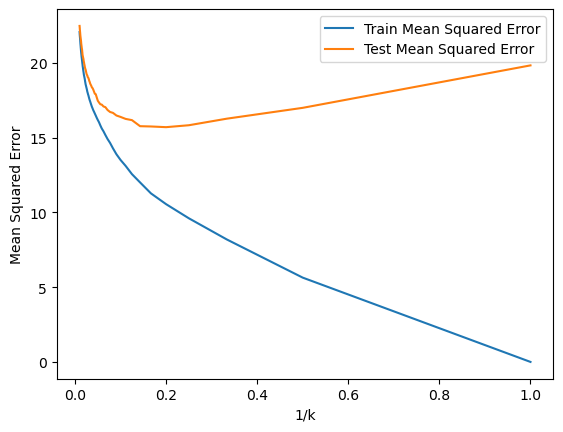

In [21]:
plot(attr["k_rec"], attr["train_error"], attr["test_error"])

In [22]:
[info, attr] = KNN("NORMALIZED")
info_data = {
    "mode": info["mode"],
    "k": info["k"],
    "train_error": info["train_error"],
    "test_error": info["test_error"]
}
pd.DataFrame(info_data.items())

NORMALIZED Mode Selected


,0,1
0,mode,NORMALIZED
1,k,7.0
2,train_error,11.0119
3,test_error,14.9106


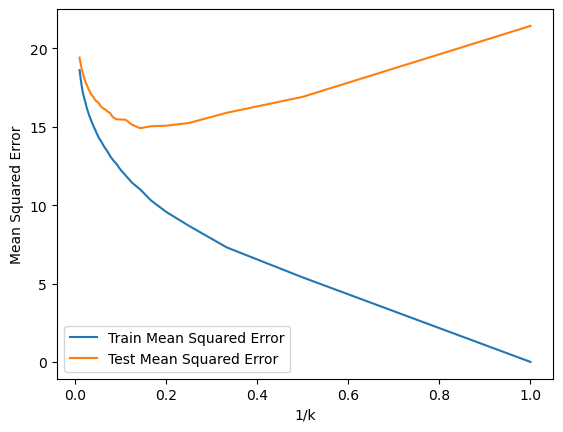

In [23]:
plot(attr["k_rec"], attr["train_error"], attr["test_error"])

### (j ) Compare KNN and Linear

In [24]:
map_temp = {}
for key, value in attr["error_summary"].items():
    map_temp[key] = [round(elem, 4) for elem in value]
map_temp
pd.DataFrame(data=map_temp.items(), columns=["Modes", "[Train Error, Test Error]"])

,Modes,"[Train Error, Test Error]"
0,Linear Regression for all the predictors,"[20.7733, 20.7629]"
1,Linear regression for quadratic and interactio...,"[18.0805, 18.1893]"
2,Linear regression after removing insignificant...,"[18.1043, 18.2446]"
3,RAW,"[10.553, 15.7048]"
4,NORMALIZED,"[11.0119, 14.9106]"


Because of non-linear nature of data, KNN performed better than linear regression.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

If sample size n is extremely large, and the number of predictors p is small, FLEXIBLE model would be better than inflexible model, as inflexible model would make the model underfit the datapoints. 
On the other hand, flexible model can effectively utilize the abundance of data to estimate complex relationships between predictors and the response variable, resulting in more accurate predictions.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

If the number of predictors p is extremely large, and the number of observations n is small, flexible model would
overfit the datapoints. Hence, in this case inflexible model would work better.

### (c) The relationship between the predictors and response is highly non-linear.

Flexible model is better than inflexible model in this case, as non-linear datapoints would have high variance and
having flexible model would help adjust with the non-linearity.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In this case the performance of a flexible statistical learning method would be worse than an inflexible method.
Because, the high variance can make it challenging for flexible methods to accurately model the underlying 
patterns and relationships. Also, in the presence of high error term variance, they may excessively fit the noise 
or random fluctuations in the data leading to potential overfitting.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [25]:
obv = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
test_point = [[0,0,0]]
distance = euclidean_distances(obv, test_point)
pd.DataFrame(distance, index=[1,2,3,4,5,6], columns=[f"Euclidean distance of observations from testpoint"])

,Euclidean distance of observations from testpoint
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


### (b) What is our prediction with K = 1? Why?

With K = 1 the prediction is green, as observation 5 i.e. 1.414214 is closest and it's respective output is green.

### (c) What is our prediction with K = 3? Why?

With K = 3 the prediction is red, as the observation number 2, 5 and 6 are red, green and red respectively the majority of these are red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

The K value would be small because K value is inversely propotional to module's flexibility. Higher the K-Value 
higher is the linearity. Since it is mentioned in the question that it is highly non-linear, K value should be low.